# 04. MVPs
A number of simple models to test initial assumptions

In [2]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from modules.fm_functions import *
predict_columns = FM_columns[2:]

Load data

In [5]:
import pandas as pd
combined_data_2022 = pd.read_csv('./data/2022_combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)
combined_data_2023 = pd.read_csv('./data/2023_combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)

In [6]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

<Axes: >

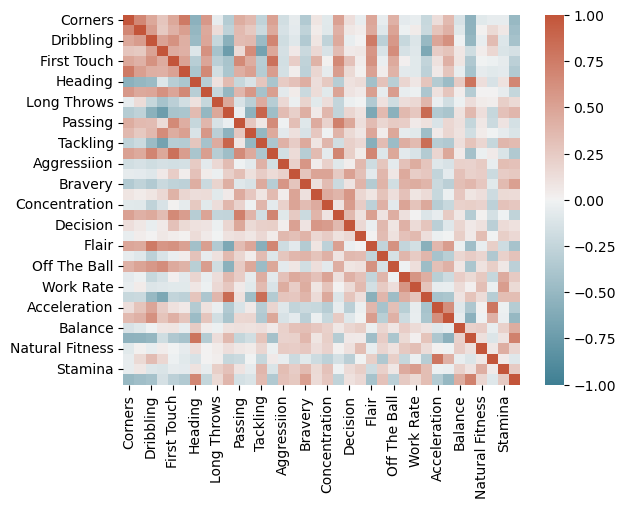

In [7]:
sns.heatmap(combined_data_2022[FM_columns[2:]].corr(), cmap=cmap, vmin=-1, vmax=1)

In [8]:
combined_data_2022.head()

,team_cluster,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
Name,,,,,,,,,,,,,,,,,,,,,
Youcef Belaïli,0,0.513527,0.512050,0.419222,0.099565,0.609974,0.616573,0.164482,0.033113,0.005737,...,12,11,14,14,12,9,12,14,13,11
Romain Hamouma,0,0.437854,0.242553,0.134042,0.106117,0.216704,0.219048,0.070122,0.000000,0.000000,...,13,6,14,14,12,8,13,13,12,12
Youssouf Koné,0,0.580240,1.000000,1.000000,1.000000,0.340354,0.000000,0.495600,0.674216,0.201548,...,14,10,14,12,12,9,14,14,15,13
Thomas Mangani,0,0.975392,0.785929,0.615300,0.401151,0.877716,0.266163,0.681635,0.298842,0.131353,...,17,13,12,11,14,12,14,11,15,14
Riad Nouri,0,0.279058,0.405789,0.341717,0.157807,0.460373,0.279212,0.335181,0.094644,0.024060,...,12,6,13,15,12,8,14,13,12,11


In [9]:
combined_data_2023.head()

,team_cluster,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
Name,,,,,,,,,,,,,,,,,,,,,
Antonio Blanco,1,0.649217,0.510069,0.481639,0.619969,0.486271,0.212846,0.862585,0.158281,0.079959,...,14,14,13,12,11,9,15,12,14,13
Rubén Duarte,1,0.704473,0.421269,0.345656,0.579945,0.372245,0.109982,0.732246,0.665653,0.148487,...,13,15,13,13,13,8,12,14,14,11
Andoni Gorosabel,1,0.529783,0.440685,0.477645,0.726890,0.260256,0.180926,0.586582,0.404119,0.096034,...,16,12,14,13,14,8,13,14,14,15
Ander Guevara,1,0.730559,0.408205,0.354239,0.495287,0.372547,0.211336,0.265097,0.227448,0.077278,...,16,13,12,14,13,10,14,11,15,13
Jon Guridi,1,0.541075,0.318148,0.290878,0.193666,0.440512,0.192817,0.491176,0.071878,0.031663,...,16,14,12,13,10,9,14,13,14,14


In [10]:
X = combined_data_2022[all_stats_columns].values
y = combined_data_2022[predict_columns].values

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MVP: Ordinary Least Squares

In [11]:
from sklearn.linear_model import ElasticNet

# Initialize the model
eln = ElasticNet(random_state=42)

# Fit the model
eln.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {eln.score(X_train, y_train)}')
print(f'R^2 (test): {eln.score(X_test, y_test)}')

R^2 (train): 0.019884116667172904
R^2 (test): 0.014564521128109468


## MVP: Partial Least Squares

In [12]:
from sklearn.cross_decomposition import PLSRegression

# Initialize the model
pls = PLSRegression()

# Fit the model
pls.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {pls.score(X_train, y_train)}')
print(f'R^2 (test): {pls.score(X_test, y_test)}')

R^2 (train): 0.2597108582512667
R^2 (test): 0.26583996352692507


## MVP: Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)

# Fit the model
rfr.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {rfr.score(X_train, y_train)}')
print(f'R^2 (test): {rfr.score(X_test, y_test)}')

R^2 (train): 0.3872972969326599
R^2 (test): 0.3241763244983862


## MVP: Extra Trees

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize the model
etr = ExtraTreesRegressor(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)

# Fit the model
etr.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {etr.score(X_train, y_train)}')
print(f'R^2 (test): {etr.score(X_test, y_test)}')

R^2 (train): 0.36708061347415644
R^2 (test): 0.32024312313041126


## MVP: MultiOutputRegressor with AdaBoost

In [15]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor

# Initialize the model
abr = AdaBoostRegressor(n_estimators=10)

# Fit the model
mor = MultiOutputRegressor(estimator=abr).fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {mor.score(X_train, y_train)}')
print(f'R^2 (test): {mor.score(X_test, y_test)}')

R^2 (train): 0.40032636593836535
R^2 (test): 0.30770221031707573


## MVP: RegressorChain with AdaBoost

In [16]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import AdaBoostRegressor

# Initialize the model
abr = AdaBoostRegressor(n_estimators=10)

# Fit the model
rch = RegressorChain(base_estimator=abr).fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {rch.score(X_train, y_train)}')
print(f'R^2 (test): {rch.score(X_test, y_test)}')

R^2 (train): 0.317543156635883
R^2 (test): 0.28383591802725566


## MVP: simple NN

In [17]:
from sklearn.neural_network import MLPRegressor

# Initialize the model
mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {mlp.score(X_train, y_train)}')
print(f'R^2 (test): {mlp.score(X_test, y_test)}')

R^2 (train): 0.3359873076740647
R^2 (test): 0.3075094622821304


c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Playground

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from modules.fm_functions import *
import warnings

warnings.filterwarnings(action='ignore')

In [19]:
def smith_waterman(s1, s2, match_score=2, gap_cost=1):
    """
    Compute the Smith-Waterman score between two strings.
    
    :param s1: First string.
    :param s2: Second string.
    :param match_score: Score for character match.
    :param gap_cost: Cost for gap (insertion/deletion).
    :return: The Smith-Waterman score for the best local alignment.
    """
    m, n = len(s1), len(s2)
    score_matrix = [[0] * (n + 1) for _ in range(m + 1)]
    max_score = 0

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if s1[i - 1] == s2[j - 1] else -match_score)
            delete = score_matrix[i - 1][j] - gap_cost
            insert = score_matrix[i][j - 1] - gap_cost
            score_matrix[i][j] = max(0, match, delete, insert)
            max_score = max(max_score, score_matrix[i][j])

    return max_score

def find_most_similar_strings(target, strings, n=5):
    """
    Find the n most similar strings to the target string from a list of strings using Smith-Waterman score.
    
    :param target: The target string to compare against.
    :param strings: A list of strings to search within.
    :param n: The number of most similar strings to return. Default is 5.
    :return: A list of the n most similar strings.
    """
    # Compute the Smith-Waterman score for each string in the list
    scores = [(string, smith_waterman(target, string)) for string in strings]
    
    # Find the n strings with the highest scores
    most_similar = sorted(scores, key=lambda x: x[1], reverse=True)[:n]
    
    # Extract and return only the strings (not the scores)
    return [string for string, score in most_similar]

In [20]:
playground_X_2022 = combined_data_2022[all_stats_columns]
playground_y = combined_data_2022[predict_columns]

playground_X_2023 = combined_data_2023[all_stats_columns]
playground_y = combined_data_2023[predict_columns]

In [35]:
find_most_similar_strings('alaba', playground_X_2022.index, n=10)

['Davide Calabria',
 'David Alaba',
 'Amine Salama',
 'William Saliba',
 'Jamal Musiala',
 'Youssouf Sabaly',
 'Trevoh Chalobah',
 'Gonzalo Escalante',
 'Helibelton Palacios',
 'Sofyan Amrabat']

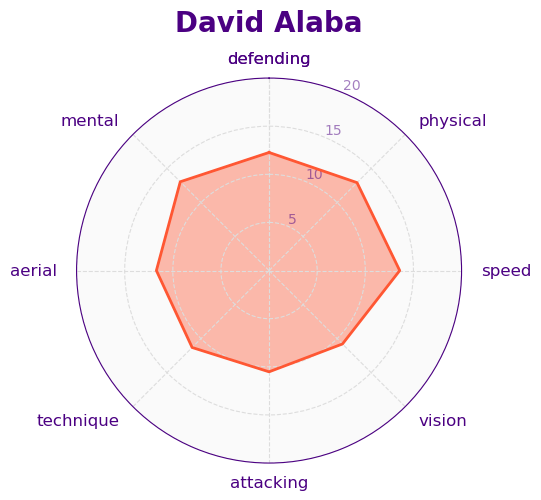

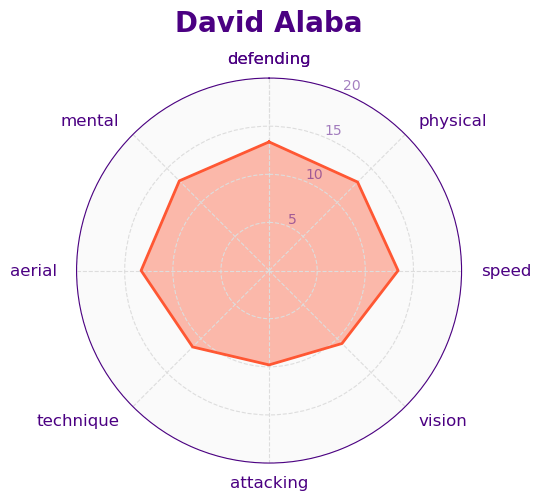

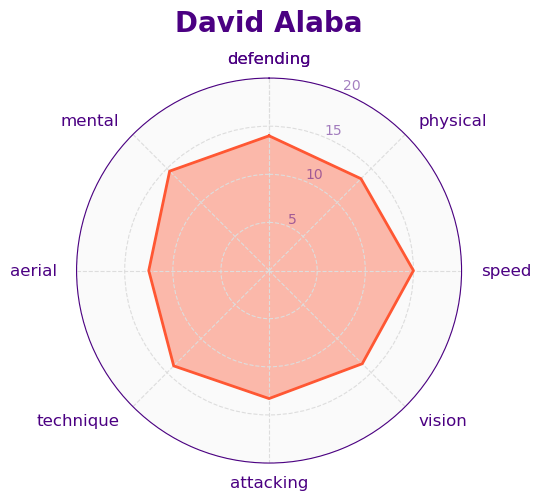

In [36]:
test_name = 'David Alaba'

model = mlp

predictions_2022 = model.predict(playground_X_2022.loc[[test_name]].values)
predictions_2022 = pd.Series(predictions_2022[0], index=FM_columns[2:])
predictions_2022['Name'] = test_name
predictions_2022_graph = calculate_skill_nodes(predictions_2022)
plot_fm_radar(predictions_2022_graph, gk=False)

predictions_2023 = model.predict(playground_X_2023.loc[[test_name]].values)
predictions_2023 = pd.Series(predictions_2023[0], index=FM_columns[2:])
predictions_2023['Name'] = test_name
predictions_2023_graph = calculate_skill_nodes(predictions_2023)
plot_fm_radar(predictions_2023_graph, gk=False)

real = playground_y.loc[[test_name]].values
real = pd.Series(real[0], index=FM_columns[2:])
real['Name'] = test_name
real_graph = calculate_skill_nodes(real)
plot_fm_radar(real_graph, gk=False)

In [23]:
skills_df = pd.DataFrame({'prediction_2022':predictions_2022,
                          'prediction_2023':predictions_2023,
                          'real':real},
                          index=predict_columns)
skills_df

,prediction_2022,prediction_2023,real
Corners,6.687447,5.330018,4
Crossing,9.487843,8.624623,6
Dribbling,10.618532,10.381249,10
Finishing,8.756425,8.157247,6
First Touch,12.740086,12.506256,11
Free Kick Taking,7.386698,6.473712,4
Heading,14.309249,15.079378,13
Long Shots,9.314609,8.3864,7
Long Throws,9.569951,9.519976,5
Marking,14.501132,14.642817,14


In [24]:
skills_df.corr()

,prediction_2022,prediction_2023,real
prediction_2022,1.000000,0.988311,0.936873
prediction_2023,0.988311,1.000000,0.938102
real,0.936873,0.938102,1.000000


In [25]:
skills_df.mean()

prediction_2022    12.795539
prediction_2023    12.485778
real               11.138889
dtype: object

In [26]:
stats_df = pd.DataFrame({'stats_2022':playground_X_2022.loc[test_name],
                         'stats_2023':playground_X_2023.loc[test_name]},
                          index=all_stats_columns)
stats_df

,stats_2022,stats_2023
defense_Blocks_Blocks,0.609820,0.655157
defense_Tackles_Tkl,0.759346,0.676823
defense_Tackles_TklW,0.657816,0.646537
defense_Tackles_Def 3rd,0.609475,0.635012
defense_Tackles_Mid 3rd,0.406546,0.563876
defense_Tackles_Att 3rd,0.436633,0.221218
defense__Int,0.650107,1.000000
defense__Clr,0.526633,0.790377
possession_Touches_Def Pen,0.162729,0.140260
possession_Touches_Def 3rd,0.812341,0.770284


In [27]:
stats_df.corr()

,stats_2022,stats_2023
stats_2022,1.000000,0.872278
stats_2023,0.872278,1.000000


<Axes: xlabel='stats_2022', ylabel='stats_2023'>

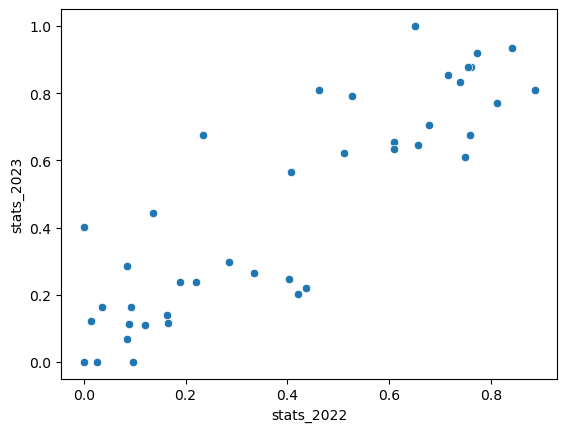

In [28]:
sns.scatterplot(data=stats_df, x='stats_2022', y='stats_2023')